# The problem with accuracy: attentional effects without attentional mechanisms
## Introduction
### Conectionist models of cognition and deep neural networks
In the 1980s, artificial neural networks trained with backpropagation gave rise to Connectionist models of cognition. Similar neural network models lie at the heart of the recent rise of deep learning, in large part because of advances in methods for training algorithms, and advances in technology such as GPUs that allow for parallelized training. When benchmarked with scalar metrics like accuracy on computer vision tasks such as object recognition, these deep neural networks appear capable of human or super-human levels of skill. The impressive accuracy of deep convolutional neural networks raises the question of how these new-and-improved networks perform in other tasks.

### Convolutional neural networks as models of the visual system
The first major gains in accuracy were seen on image classification tasks such as ImageNet, and the deep neural networks that made these advances were built with what are known as convolutional layers. As the name implies, these layers perform a convolution-like operation by multiplying filters of learned weights with the input image, producing as outputs feature maps that can be further transformed by succeeding layers. Many researchers have drawn parallels between the architecture of convolutional neural networks (CNNs) and the architecture of the mammalian visual system in the brain. Like CNNs, the visual system has a hierarchical structure, and is thought to function in part by performing transformations at each level of this hierarchy so that high-dimensional, low-level features are mapped into low-dimensional abstract representations. Several recent studies in the realm of cognitive neuroscience have more directly tested the similarities between CNNs and the visual system, by measuring the representations in both. Representations can be easily extracted from CNNs because they are "transparent box" models--i.e. we have access to all the activations of the individual units when we "show" them a stimulus. In the same studies, representations in brain activity were obtained with electrophysiological or functional imaging methods. Such studies have found in general that representations are similar. (The comparison depends on representational similarity methods, but the concern of this study is not the validity of those methods.)

### Do similar representations arise due to the constraints of learning a task?
The authors conclude that one factor that may cause this representational similarity is that the goal-driven tasks provide a constraint on learning. In other words, these hierarchichal architectures learn similar representations because those representations provide a way to succesfully carry out behavior. Similar claims have been made elsewhere, e.g. that the brain and artificial networks both learn similar representations of location when performing navigation tasks.

### Another type of constraint: controlled behavioral tasks
Importantly, the researchers constrain the behavioral task when measuring brain activity, with the goal of being able to directly compare behavior of experimental subjects with the 'behavior' of neural networks. Specifically, the subjects are only shown the visual stimuli very briefly, typically about 100 ms for monkey electophysiology experiments and 300 ms for human neuroimaging experiments. There are a couple of reasons for this. The first is to allow for an apples-to-apples copmarison between the brain and CNNs. Although the brain is highly recurrent, CNNs are purely **feedforward**. The researchers want to claim that they have only elicited the initial feedforward activity in the visual system by just briefly showing subjects the stimuli, without allowing feedback to influence the representation.
The second reason for the constraint of showing images only briefly is more historical. Classically, the visual system has been studied with what has been termed **passive vision** approach. This approach could be characterized as conceiving of the eye as unmoving, with a still image falling upon it that is then processed in parallel across the scene to extract information. These types of models have obviously been successful, and the incredible accuracy of CNNs might even be described as the culmination of this approach. The point here is not to debate about issues with passive vision models; most readers probably take it for granted that humans move their eyes, and anyone who has tried to walk through a crowd while texting will know that there are limitations on our ability to process the entire visual scene in parallel.

### How much can accuracy on a task tell us about cognition? Visual search tasks as a case study
The point is that the same constraint that was used to make apples-to-apples comparisons between CNNs and the brains, briefly showing stimuli, has also been used in visual search tasks in the laboratory, because of the way in which the visual system has typically been studied. The fact that the same constraint was applied to visual search task lets us invert the postulate about how goal-driven tasks constrain learning to produce useful representations: if a CNN has learned the same representation as the brain, then its behavior when performing tasks should match our behavior. In other words, we are asking whether we can extend a claim about CNNs, that they provide good models of the visual system, by examining how they behave when performing a visual search task. There are several objections that could be made to doing so, including the question of whether the task we'll look at is really any different from image recognition. But let's pretend for a moment that the question is worth asking. Why is it worth doing so? To consider more generally how much we can learn about cognition by measuring behavior with a scalar metric applied to a highly constrained task.

What is that task? In the "classical" form of the visual search paradigm, experimenters present a stimulus to a subject made up of discrete items, i.e. objects. The subject is asked to report whether a target is present among distractors-- the experimenter sets the probability that the target will be present on any given trial. Experimenters measure the reaction time and/or accuracy of the subjects. Often, the results are presented as a plot of reaction time as a function of set size (the number of discrete items in stimulus). By fitting a line to the plot of reaction times as a function of set size and taking the slope of that line, experimenters produced estimates of processing speed, i.e. "seconds per item". One of the critical findings from studies of such tasks is that the slopes are almost horizontal when targets differ from distractors in some clearly salient feature, e.g. a red target among green distractors, and slopes become much steeper when targets differ from distractors in some harder-to-distinguish set of features, e.g., a digital 2 among digital 5s. Some examples stimuli are shown below, generated with https://github.com/NickleDave/searchstims.

<table><tr>
<td> <img src="../static/redvert_v_greenvert_set_size_4_target_present_55.png" alt="efficient" style="width: 250px;"/> </td>
<td> <img src="../static/two_v_five_set_size_6_target_present_78.png" alt="inefficient" style="width: 250px;"/> </td>
</tr>
<tr>
<td> Results in <b>efficient</b> search </td>
<td> Results in <b>inefficient</b> search </td>
</tr>
</table>

Below is a figure explaining the basic visual search paradigm, reproduced from [Wolfe Horowitz 2017](http://search.bwh.harvard.edu/new/pubs/FiveFactors_Wolfe-Horowitz_2017.pdf)

<img src="../static/Fig-2-Wolfe-Horowitz-2017.png" alt="inefficient" style="width: 900px;"/>

Early interpretations of these findings were that horizontal slopes resulted from parallel processing of salient features, which could be done almost instantaneously regardless of set size, while steep slopes results from serial processing of conjunctions of features, that by necessity took time as the set size increased. However, Wolfe (1998) showed that there is no clear cut segregation of slopes into one type or the other, and that in fact the distributions of slope overlap so much it is not possible to distinguish them. He has proposed talking about search in a way that is agnostic about cognitive processes, and instead focusing on a spectrum of slopes that depends in some way on fatures: when a salient feature like color is what discriminates the target from the distractor, this allows for **efficient** search, like in the visual search stimulus on the left. When a complex conjunction of features distinguishes the target from the distractor, as in the visual search stimulus on the right, this results in **inefficient** search.

However, this approach is not always used. In some cases, the stimulus is shown only briefly to the subject, and then after a variable length of time a masking stimulus such as white noise is shown. During the period between the stimulus with a set of items and the masking stimulus, the subject is thought to "search their internal representation" (Wolfe 1998). 

### Accuracy as a measure of attentional effects
Although these classic visual search tasks were originally designed to answer questions about how features were processed across the visual field, they went on to became the basis for most modern theories of selective visual attention. In essence, the feature integration theory (FIT) held that some features could be processed in parallel, in a pre-attentional way, but a conjunction of features required directing attention to it, and that items consisting of such features were processed in a serial way. Given this theory about the algorithms underlying attention, reaction times become a proxy for attention; they are what we measure to see if our theories about attention are correct. The same is true for accuracy, when the task is changed as just described: measures of how accuracy changes with search difficulty tell us whether attention behaves as we think it does. **But of course CNNs have no built-in mechanism of attention; in effect, they process the entire visual field in parallel, in a single pass, instantaneously**. Therefore, if we see attention-like effects when measuring the accuracy of CNNs, we must either conclude either one of two things: (1) attention doesn't exist, because an algorithm without attention can produce the same behavior that we produce. Maybe attention-like effects are just what happens because targets are hard to discriminate from distractors, regardless of the features. Alternatively, we can conclude that (2) we have not chosen a task and/or metric that gives us insight into the processing going on. Maybe accuracy is not actually telling us much about the behavior.

## Results
In an initial set of simulations, we trained a CNN to "perform" the visual search task. We used the AlexNet architecture, which has previously been used in studies comparing CNNs to the human visual system. To train AlexNet, we followed a fine-tuning approach, where we re-used weights from training this CNN on the ImageNet dataset. During fine-tuning, the weights in the convolutional layers were frozen, but randomly initialized weights in the final fully-connected layers were update with a very small learning rate. The original softmax layer with 1000 outputs representing ImageNet classes was replaced with a 2-unit softmax layer, where one unit represented a response of "target present" and the other a response of "target absent". This approach is similar to that reported by Poder 2017; we discuss differences in the details of fine-training below. To generate visual search stimuli that could be fed into a neural network, we used a simple Python package built on top of the PyGame library (https://github.com/NickleDave/searchstims). Images followed the classic grid paradigm described by Wolfe (1998). The library applied jitter to the items, so that two images could be different even if both images had the same set size and target present condition, and the items were in the exact same cells.  This is typically done with visual search stimuli used in psychophysics experiments but an added benefit was that this allowed us to create a large set of unique training images (on the order of ten thousand) for each set size and condition, in effect resulting in a sort of data augmentation, as is often used when training neural networks.

### Convolutional neural networks show attentional effects without any attention mechanisms in spite of processing images in parallel
After training AlexNet to perform this task, and plotting accuracy as a function of set size, we found to our surprise what resemble the typical dependence of accuracy on set size, where accuracy decreased as the number of distractors increased.

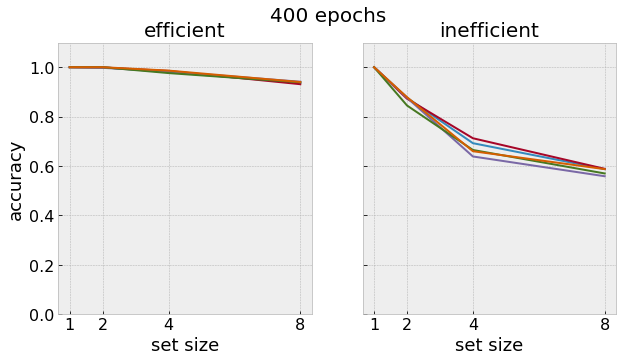

In [1]:
%matplotlib inline
import os

from searchnets.plots.figures import eff_v_ineff, mn_slope_by_epoch

TEST_RESULTS_DIR = '../../data/experiment_1/results'
eff_400_results = os.path.join(TEST_RESULTS_DIR,
                            'config_efficient_400_epochs_models/test_alexnet_output.gz')
ineff_400_results = os.path.join(TEST_RESULTS_DIR,
                             'config_inefficient_400_epochs_models/test_alexnet_output.gz')

eff_v_ineff(eff_400_results,
            ineff_400_results,
            epochs=400)

**Figure 1. Accuracy of AlexNet when reporting whether a target is present or absent, given efficient or inefficent visual search stimuli** X axis is set size, i.e., number of items in the visual search stimulus shown to the network. Y axis is mean accuracy for each set size, as measured on a previously unseen test set. The test set contained ~3000 images, balanced so that there were equal numbers of images for each set size.  Each line represents one trained network; there are five replicates total.

### Higher accuracy correlates with stronger attentional effects
Given the surprising result that CNNs showed attention-like effects without attention mechanisms and in spite of processing their inputs in a parallel, feedforward fashion, we next asked whether these effects might depend on training.

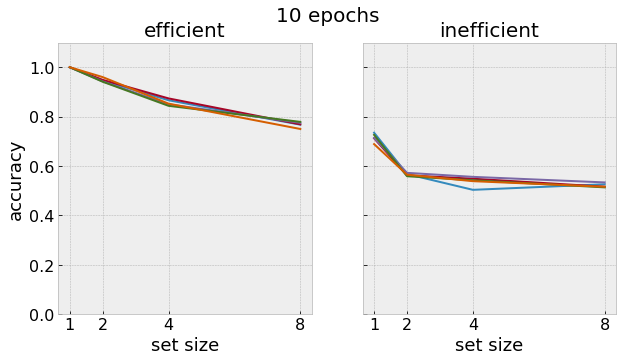

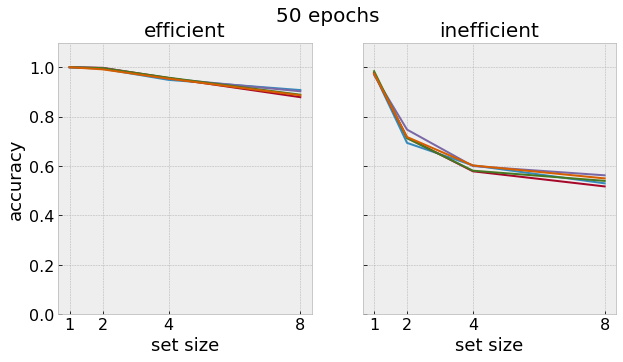

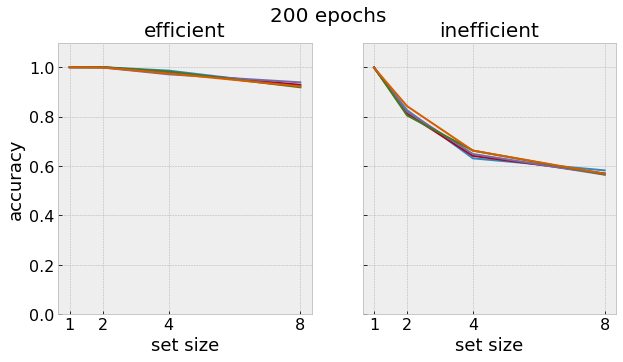

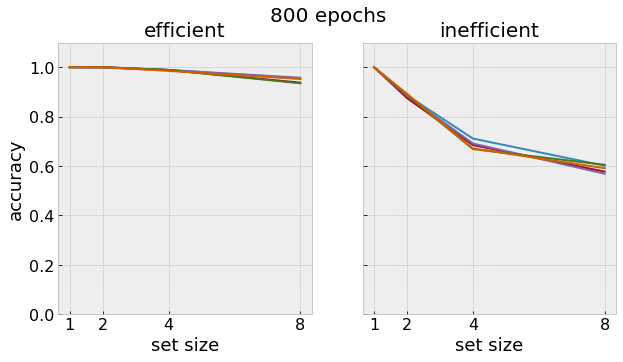

In [2]:
TEST_RESULTS_DIR = '../../data/experiment_2/results'
epochs_list = [10, 50, 200, 800]
eff_results_list = []
ineff_results_list = []
for epochs in epochs_list:
    eff_results = os.path.join(TEST_RESULTS_DIR, f'config_efficient_{epochs}_epochs_models/test_alexnet_output.gz')
    eff_results_list.append(eff_results)
    ineff_results = os.path.join(TEST_RESULTS_DIR, f'config_inefficient_{epochs}_epochs_models/test_alexnet_output.gz')
    ineff_results_list.append(ineff_results)
    eff_v_ineff(eff_results,
                ineff_results,
                epochs=epochs)

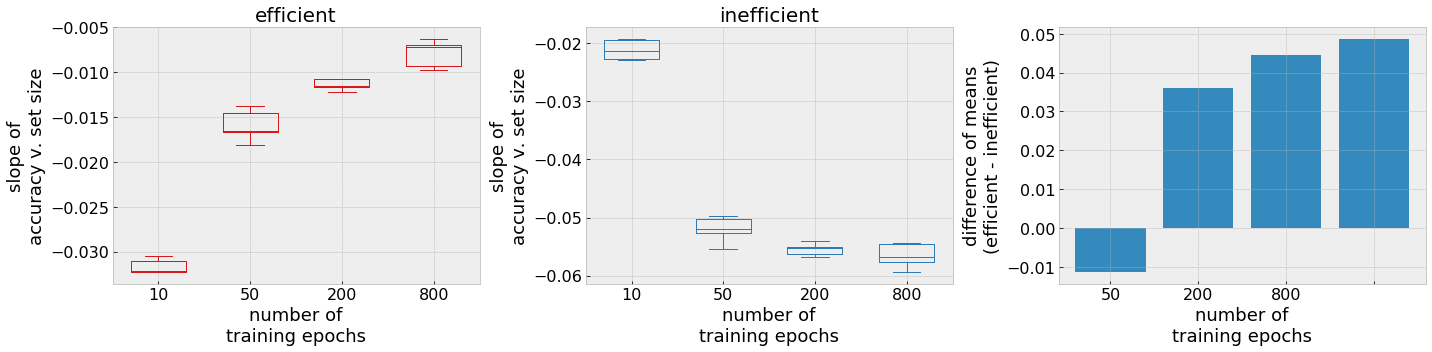

In [3]:
mn_slope_by_epoch(eff_results_list, ineff_results_list, epochs_list)

## Methods
Alexnet training:
• based on Poder 2017
https://arxiv.org/pdf/1707.09775.pdf
• Stochastic gradient descent
• Learning rate for fully-connected layers: 1e-20
• 10 epochs (as in Poder 2017), and 400 epochs